In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


In [170]:
df1 = pd.read_csv('Desktop\cricket dataset\MAS-ACA-Masterclass-main\CSV Files\matches_updated_mens_ipl.csv')

In [171]:
df2 = pd.read_csv('Desktop\cricket dataset\MAS-ACA-Masterclass-main\CSV Files\deliveries_updated_mens_ipl.csv')

In [172]:
ipl_df = pd.merge(df1,df2,on = 'matchId',how= 'inner')

In [173]:
ipl_df.head()

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,NaN,Indian Premier League,05-04-2017,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Indian Premier League,05-04-2017,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Indian Premier League,05-04-2017,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Indian Premier League,05-04-2017,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Indian Premier League,05-04-2017,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
ipl_df['season'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int64)

In [175]:
ipl_df.columns

Index(['outcome', 'event', 'date', 'gender', 'reserve_umpire', 'team1',
       'toss_winner', 'umpire2', 'match_referee', 'season', 'team2',
       'winner_runs', 'balls_per_over', 'player_of_match', 'date1',
       'neutralvenue', 'venue', 'method', 'toss_decision', 'city', 'tv_umpire',
       'date2', 'winner', 'umpire1', 'match_number', 'eliminator',
       'winner_wickets', 'matchId', 'inning', 'over_ball', 'over', 'ball',
       'batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes',
       'Penalty', 'dismissal_kind', 'player_dismissed'],
      dtype='object')

In [176]:
ipl_df = ipl_df[(ipl_df.inning == 1) | (ipl_df.inning == 2)]

In [177]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['batsman_runs'] + x['extras'], axis = 1)

In [178]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [179]:
ipl_df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [180]:
ipl_df[ipl_df.batting_team == 'Mumbai Indians'].total_runs.value_counts()

1    11337
0    9974 
4    3198 
2    1721 
6    1403 
3    104  
5    54   
7    7    
Name: total_runs, dtype: int64

In [181]:
ipl_df[ipl_df.batting_team == 'Chennai Super Kings'].total_runs.value_counts()

1    10515
0    8661 
4    2829 
2    1706 
6    1259 
3    98   
5    46   
7    9    
Name: total_runs, dtype: int64

In [182]:
ipl_df= ipl_df[ipl_df['season'] == 2019]

In [183]:
# Mi batting first , csk batting second 
t1 = 'Mumbai Indians'
t2 = 'Chennai Super Kings'

In [184]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.inning == 1)].matchId.unique()

array([1175370, 1178419, 1181768], dtype=int64)

In [185]:
ipl_df.groupby(['season'])['matchId'].unique()

season
2019    [1175356, 1175357, 1175358, 1175359, 1175360, 1175361, 1175362, 1175363, 1175364, 1175365, 1175366, 1175367, 1175368, 1175369, 1175370, 1175371, 1175372, 1178393, 1178394, 1178395, 1178396, 1178397, 1178398, 1178399, 1178400, 1178401, 1178402, 1178403, 1178404, 1178405, 1178406, 1178407, 1178408, 1178409, 1178410, 1178411, 1178412, 1178413, 1178414, 1178415, 1178416, 1178417, 1178418, 1178419, 1178420, 1178421, 1178422, 1178423, 1178424, 1178425, 1178426, 1178427, 1178428, 1178429, 1178430, 1178431, 1181764, 1181766, 1181767, 1181768]
Name: matchId, dtype: object

In [186]:
ipl_df.head(10)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,total_runs,isOut
28148,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.1,0,1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
28149,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.2,0,2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28150,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.3,0,3,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28151,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.4,0,4,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28152,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.5,0,5,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
28153,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.6,0,6,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28154,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,1.1,1,1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,Harbhajan Singh,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
28155,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,1.2,1,2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,Harbhajan Singh,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
28156,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,fie

In [187]:
ipl_df['matchId'].unique()

array([1175356, 1175357, 1175358, 1175359, 1175360, 1175361, 1175362,
       1175363, 1175364, 1175365, 1175366, 1175367, 1175368, 1175369,
       1175370, 1175371, 1175372, 1178393, 1178394, 1178395, 1178396,
       1178397, 1178398, 1178399, 1178400, 1178401, 1178402, 1178403,
       1178404, 1178405, 1178406, 1178407, 1178408, 1178409, 1178410,
       1178411, 1178412, 1178413, 1178414, 1178415, 1178416, 1178417,
       1178418, 1178419, 1178420, 1178421, 1178422, 1178423, 1178424,
       1178425, 1178426, 1178427, 1178428, 1178429, 1178430, 1178431,
       1181764, 1181766, 1181767, 1181768], dtype=int64)

In [188]:
ipl_df.head()

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,total_runs,isOut
28148,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.1,0,1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
28149,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.2,0,2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28150,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.3,0,3,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28151,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.4,0,4,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
28152,NaN,Indian Premier League,23-03-2019,male,HAS Khalid,Royal Challengers Bangalore,Chennai Super Kings,BNJ Oxenford,J Srinath,2019,Chennai Super Kings,NaN,6,Harbhajan Singh,NaN,NaN,MA Chidambaram Stadium,NaN,field,Chennai,Nitin Menon,NaN,Chennai Super Kings,AY Dandekar,1.0,NaN,7.0,1175356,1,0.5,0,5,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [189]:
ipl_df.groupby(['matchId'])['date'].unique()

matchId
1175356    [23-03-2019]
1175357    [24-03-2019]
1175358    [24-03-2019]
1175359    [25-03-2019]
1175360    [26-03-2019]
1175361    [27-03-2019]
1175362    [28-03-2019]
1175363    [29-03-2019]
1175364    [30-03-2019]
1175365    [30-03-2019]
1175366    [31-03-2019]
1175367    [31-03-2019]
1175368    [01-04-2019]
1175369    [02-04-2019]
1175370    [03-04-2019]
1175371    [04-04-2019]
1175372    [05-04-2019]
1178393    [06-04-2019]
1178394    [06-04-2019]
1178395    [07-04-2019]
1178396    [07-04-2019]
1178397    [08-04-2019]
1178398    [09-04-2019]
1178399    [10-04-2019]
1178400    [11-04-2019]
1178401    [12-04-2019]
1178402    [13-04-2019]
1178403    [13-04-2019]
1178404    [14-04-2019]
1178405    [14-04-2019]
1178406    [15-04-2019]
1178407    [16-04-2019]
1178408    [17-04-2019]
1178409    [18-04-2019]
1178410    [19-04-2019]
1178411    [20-04-2019]
1178412    [20-04-2019]
1178413    [21-04-2019]
1178414    [21-04-2019]
1178415    [22-04-2019]
1178416    [23-04-2019]
1178417 

In [190]:
required_matchId = 1181768

In [191]:
ipl_df[ipl_df.matchId == required_matchId].head(1)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,total_runs,isOut
42213,NaN,Indian Premier League,12-05-2019,male,CK Nandan,Mumbai Indians,Mumbai Indians,Nitin Menon,J Srinath,2019,Chennai Super Kings,1.0,6,JJ Bumrah,NaN,NaN,Rajiv Gandhi International Stadium,NaN,bat,Hyderabad,NJ Llong,NaN,Mumbai Indians,IJ Gould,NaN,NaN,NaN,1181768,1,0.1,0,1,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [192]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [193]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [194]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [195]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [196]:
t1_outcomes_count

[685, 789, 107, 8, 234, 112, 92]

In [197]:
t2_outcomes_count

[793, 833, 118, 3, 211, 87, 88]

In [198]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

In [199]:
t1_pb, t2_pb

([0.33793783917118897,
  0.3892451899358658,
  0.05278737049827331,
  0.003946719289590528,
  0.11544153922052294,
  0.05525407005426739,
  0.04538727183029107],
 [0.3717768401312705,
  0.39052977027660574,
  0.05532114392873887,
  0.0014064697609001407,
  0.09892170651664323,
  0.040787623066104076,
  0.04125644631973746])

In [200]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [201]:
# first innings
i1p_0 = t1_cum_pb[0]
i1p_1 = t1_cum_pb[1]
i1p_2 = t1_cum_pb[2]
i1p_3 = t1_cum_pb[3]
i1p_4 = t1_cum_pb[4]
i1p_6 = t1_cum_pb[5]
i1p_w = 1

pred_runs = 0
pred_wks = 0

for i in range(120):
    r_value = np.random.random()

    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        if pred_wks == 10:
            break

In [202]:
over_ball = 10.1
over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

print(over_no*6+ ball_no)

61


In [206]:
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    
    if ball_no >= 6:
        ball_no = 6
    current_balls = over_no*6 + ball_no
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

In [207]:
innings_1_runs(10.3,87,3)

157

In [208]:
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_no = int(str(over_ball).split('.')[0])
    ball_no = int(str(over_ball).split('.')[1])
    
    if ball_no >= 6:
        ball_no = 6
    current_balls = over_no*6 + ball_no 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

In [209]:
innings_2_runs(10.0, 67, 0, 167)

124

In [210]:
mdf = ipl_df[ipl_df.matchId == required_matchId]

In [211]:
mdf.reset_index(inplace = True, drop = True)

In [212]:
df_ing1 = mdf[mdf.inning == 1]
df_ing2 = mdf[mdf.inning == 2]

In [213]:
df_ing1 = df_ing1.sort_values('over_ball', ascending = True)
df_ing2 = df_ing2.sort_values('over_ball', ascending = True)

In [214]:
df_ing1.head(2)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,total_runs,isOut
0,NaN,Indian Premier League,12-05-2019,male,CK Nandan,Mumbai Indians,Mumbai Indians,Nitin Menon,J Srinath,2019,Chennai Super Kings,1.0,6,JJ Bumrah,NaN,NaN,Rajiv Gandhi International Stadium,NaN,bat,Hyderabad,NJ Llong,NaN,Mumbai Indians,IJ Gould,NaN,NaN,NaN,1181768,1,0.1,0,1,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,NaN,Indian Premier League,12-05-2019,male,CK Nandan,Mumbai Indians,Mumbai Indians,Nitin Menon,J Srinath,2019,Chennai Super Kings,1.0,6,JJ Bumrah,NaN,NaN,Rajiv Gandhi International Stadium,NaN,bat,Hyderabad,NJ Llong,NaN,Mumbai Indians,IJ Gould,NaN,NaN,NaN,1181768,1,0.2,0,2,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [215]:
df_ing1.reset_index(inplace = True, drop = True)

In [216]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [217]:
ing1_actual_score = sum(df_ing1.total_runs)

In [218]:
len(df_ing1)

123

In [219]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.over_ball[i]
    curr_wickets += df_ing1.isOut[i]
    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing1_runs_pred.append(prediction)

In [220]:
ing2_actual_score = sum(df_ing2.total_runs)

In [221]:

curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.over_ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

# RUNS PREDIICTION 1 ST INNING 

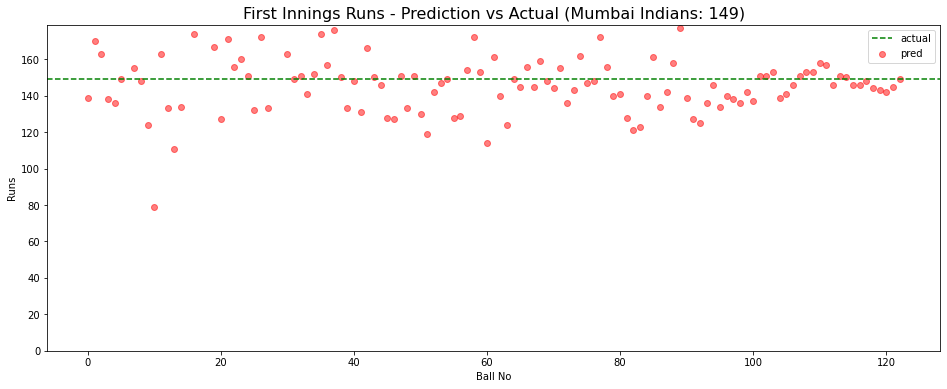

In [222]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

In [223]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

12.715447154471544

# RUNS PREDIICTION 2 ND INNING

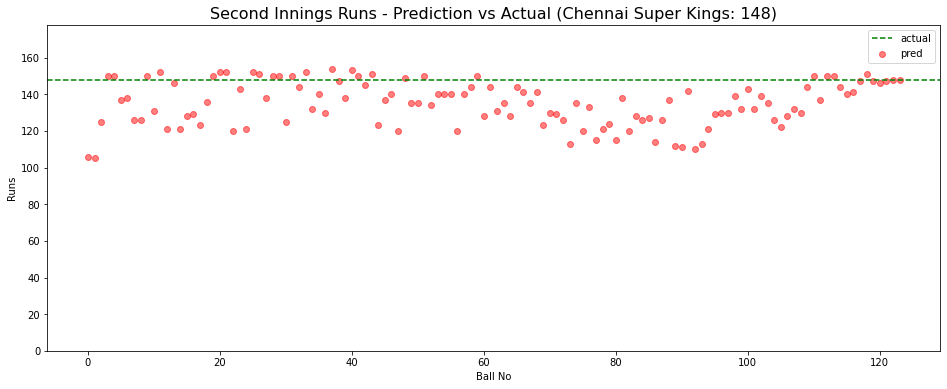

In [224]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

In [225]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

13.919354838709678

In [226]:
over_ball=10.2
over_no = int(str(over_ball).split('.')[0])
ball_no = int(str(over_ball).split('.')[1])

In [227]:
over_no

10

In [228]:
int(str(ipl_df['over_ball'])

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_1428/1418373253.py, line 1)

In [229]:
ball_no

2

In [230]:
over_ball = 10.3

In [231]:
over_no = int(str(over_ball).split('.')[0])

In [232]:
over_no

10

In [122]:
ball_no = int(str(over_ball).split('.')[1])

In [123]:
ball_no

2

In [152]:
over_ba = curr_score

In [155]:
ipl_df['over_ball'].unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,
        5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5,
       10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4,
       12.5, 12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2,
       16.3, 16.4, 16.5, 16.6, 17.1,  6.7, 13.7, 15.7, 17.2, 17.3, 17.4,
       17.5,  0.7,  0.8,  0.9, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 12.7, 14.7, 18.7,  8.7, 16.7,
       18.8,  4.7,  9.7, 19.7, 13.8, 17.7,  3.7, 11.7, 10.7,  7.7, 17.8,
       14.8, 19.8,  5.7, 12.8,  2.8,  1.7, 17.9, 15

# WIN PREDICTION - 1 ST INNING


In [234]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.over_ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(ing1_prediction, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

# WIN PREDICTION 2ND INNING 

In [236]:
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.over_ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(ing1_prediction, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

# WIN PREDICTION CHART 

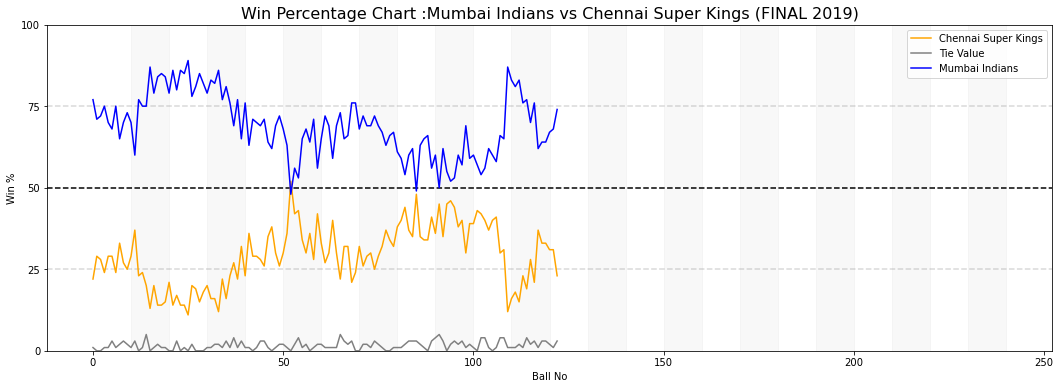

In [254]:
plt.figure(figsize = (18, 6))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(mdf), 20):
    if i < len(mdf) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'black')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])


# add confidence interval
# ci = 3
# plt.fill_between(x1_values, np.array(y1_values) - ci, np.array(y1_values) + ci, color = 'orange', alpha = 0.2 )
# plt.fill_between(x2_values, np.array(y2_values) - ci, np.array(y2_values) + ci, color = 'grey', alpha = 0.2 )
# plt.fill_between(x3_values, np.array(y3_values) - ci, np.array(y3_values) + ci, color = 'blue', alpha = 0.2 )

plt.title( 'Win Percentage Chart :' + t1 + ' vs ' + t2+ ' ' '(FINAL 2019)', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()